<br>
<font size = 18>Warner Music Case Study</font>
<br>
<br>
<br>

<font size = 6> A predition of the success of artists on Spotify</font>

<div class="alert alert-warning">
<font size = 3>The aim of this case study is to predict success of artists by analysing their movement along different playlists. Those playlists have a critical impact on popularity of particular artists. Each of the artists has characteristics represented by certain features that determine the probability of success.    </font>
</div>

<div class="alert alert-info">
<font size = 3>Importing required libraries:</font>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import glob
import collections
import networkx as nx
import seaborn as sns
import warnings
from mpl_toolkits.mplot3d import Axes3D



In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reading in data

In [3]:
%%capture
# Read all CSVs from specified folder
def read_all_csvs(path):
    os.chdir(path)
    all_csv=[]
    for file in glob.glob("*.csv"):
        all_csv.append(file)
    data_sets={}
    for x in all_csv:
        name = x.replace(" ", "_")
        data_sets[name] = pd.read_csv(x,error_bad_lines=False,warn_bad_lines=False, encoding='latin-1')
    return(data_sets)

read_all_csvs('/project')

In [4]:
%%time
data = pd.read_csv('cleaned_data.csv')
all_artists = data.copy()
playlist_ids_and_titles = pd.read_csv('playlists_ids_titles.csv',encoding = 'latin-1',error_bad_lines=False,warn_bad_lines=False)
playlist_mapper = playlist_ids_and_titles[playlist_ids_and_titles.id.str.len()==22].drop_duplicates(['id'])

datafile = 'cleaned_data.csv'
df = pd.read_csv(datafile, dtype={'Unnamed: 0': np.int64, 'customer_id': np.str})

<string>:2: DtypeWarning: Columns (2,13) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 49.7 s, sys: 4.08 s, total: 53.8 s
Wall time: 51.4 s


In [5]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,day,log_time,mobile,track_id,isrc,upc,artist_name,...,hour,minute,week,month,year,date,weekday,weekday_name,playlist_id,playlist_name
0,0,9,"('small_artists_2016.csv', 9)",10,20160510T12:15:00,True,8f1924eab3804f308427c31d925c1b3f,USAT21600547,7.567991e+10,Sturgill Simpson,...,12,15,19,5,2016,2016-05-10,1,Tuesday,NaN,NaN
1,1,19,"('small_artists_2016.csv', 19)",10,20160510T12:15:00,True,8f1924eab3804f308427c31d925c1b3f,USAT21600547,7.567991e+10,Sturgill Simpson,...,12,15,19,5,2016,2016-05-10,1,Tuesday,NaN,NaN
2,2,29,"('small_artists_2016.csv', 29)",10,20160510T14:00:00,True,8f1924eab3804f308427c31d925c1b3f,USAT21600547,7.567991e+10,Sturgill Simpson,...,14,0,19,5,2016,2016-05-10,1,Tuesday,NaN,NaN
3,3,39,"('small_artists_2016.csv', 39)",10,20160510T10:45:00,True,8f1924eab3804f308427c31d925c1b3f,USAT21600547,7.567991e+10,Sturgill Simpson,...,10,45,19,5,2016,2016-05-10,1,Tuesday,NaN,NaN
4,4,49,"('small_artists_2016.csv', 49)",10,20160510T10:15:00,True,8f1924eab3804f308427c31d925c1b3f,USAT21600547,7.567991e+10,Sturgill Simpson,...,10,15,19,5,2016,2016-05-10,1,Tuesday,NaN,NaN


In [6]:
df.tail()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,day,log_time,mobile,track_id,isrc,upc,artist_name,...,hour,minute,week,month,year,date,weekday,weekday_name,playlist_id,playlist_name
3805494,3805494,38054949,1301551,10,20170610T10:30:00,True,4cb959db5be04d2fa5ca4c137b651a99,GBAHS1600395,1.902959e+11,Anne-Marie,...,10,30,23,6,2017,2017-06-10,5,Saturday,NaN,NaN
3805495,3805495,38054959,1301561,10,20170710T18:15:00,True,4cb959db5be04d2fa5ca4c137b651a99,GBAHS1600395,1.902959e+11,Anne-Marie,...,18,15,28,7,2017,2017-07-10,0,Monday,NaN,NaN
3805496,3805496,38054969,1301571,10,20170710T18:00:00,True,4cb959db5be04d2fa5ca4c137b651a99,GBAHS1600395,1.902959e+11,Anne-Marie,...,18,0,28,7,2017,2017-07-10,0,Monday,NaN,NaN
3805497,3805497,38054979,1301581,10,20170710T14:15:00,False,4cb959db5be04d2fa5ca4c137b651a99,GBAHS1600395,1.902959e+11,Anne-Marie,...,14,15,28,7,2017,2017-07-10,0,Monday,NaN,NaN
3805498,3805498,38054989,1301591,10,20170710T12:00:00,True,4cb959db5be04d2fa5ca4c137b651a99,GBAHS1600395,1.902959e+11,Anne-Marie,...,12,0,28,7,2017,2017-07-10,0,Monday,NaN,NaN


In [7]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'day', 'log_time',
       'mobile', 'track_id', 'isrc', 'upc', 'artist_name', 'track_name',
       'album_name', 'customer_id', 'postal_code', 'access', 'country_code',
       'gender', 'birth_year', 'filename', 'region_code', 'referral_code',
       'partner_name', 'financial_product', 'user_product_type',
       'offline_timestamp', 'stream_length', 'stream_cached', 'stream_source',
       'stream_source_uri', 'stream_device', 'stream_os', 'track_uri',
       'track_artists', 'source', 'DateTime', 'hour', 'minute', 'week',
       'month', 'year', 'date', 'weekday', 'weekday_name', 'playlist_id',
       'playlist_name'],
      dtype='object')

<div class="alert alert-info">
<font size = 3>There are 45 variables in the dataset. At a first glance some of them seem to be unclear or redundant, e.g.: 'Unnamed: 0','Unnamed: 0.1', 'Unnamed: 0.1.1' </font>
</div>

In [8]:
df.shape

(3805499, 45)

<div class="alert alert-info">
<font size = 3>Number of observations in the dataset is equal to 3 805 499. This are unique streams represented as rows in the dataframe. Each of them has 45 characteristics, which will be explored in exloratory analysis below. 
    It is viable to find out which columns bare significant information and which are undesirable noise.</font>
    </div>

In [9]:
%%time
df.info()
# data types of particular variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3805499 entries, 0 to 3805498
Data columns (total 45 columns):
Unnamed: 0           int64
Unnamed: 0.1         int64
Unnamed: 0.1.1       object
day                  int64
log_time             object
mobile               bool
track_id             object
isrc                 object
upc                  float64
artist_name          object
track_name           object
album_name           object
customer_id          object
postal_code          object
access               object
country_code         object
gender               object
birth_year           float64
filename             object
region_code          object
referral_code        float64
partner_name         object
financial_product    object
user_product_type    object
offline_timestamp    float64
stream_length        float64
stream_cached        float64
stream_source        object
stream_source_uri    object
stream_device        object
stream_os            object
track_uri         

In [10]:
date_count = df.date.value_counts(dropna=False)
date_count

2017-05-10    349052
2017-06-10    328465
2017-07-10    298310
2017-04-10    260368
2017-03-10    252229
2017-02-10    220711
2016-09-10    196641
2016-10-10    184916
2016-08-10    178459
2016-11-10    171150
2016-06-10    170708
2017-01-10    162609
2016-07-10    158154
2016-12-10    146615
2016-05-10    142871
2016-03-10    111453
2016-02-10    108856
2016-04-10    103670
2016-01-10     53867
2015-12-10     48013
2015-11-10     47232
2015-10-10     25879
2015-09-10     23622
2015-08-10     20139
2015-07-10     10992
2015-05-10     10694
2015-06-10      9487
2015-04-10      4917
2015-03-10      3417
2014-12-10       687
2015-02-10       550
2015-01-10       351
2014-11-10       220
2014-06-10        86
2014-10-10        40
2014-07-10        30
2014-09-10        23
2014-08-10        16
Name: date, dtype: int64

<div class="alert alert-info">
<font size = 3>From above cell we can see the skewness of number of streams in the dataset with respect to time. Most of the observations originate from the beginning of year 2016 onwards till May 2017 which is the last month of records</font>

In [11]:

date_nan = df.date.isna().sum()
date_totcount = df.date.count()
date_nan # Number of mising values in date variable
date_totcount # Total number of date instances


0

3805499

Text(0.5, 0, 'birth year')

Text(0, 0.5, 'stream length')

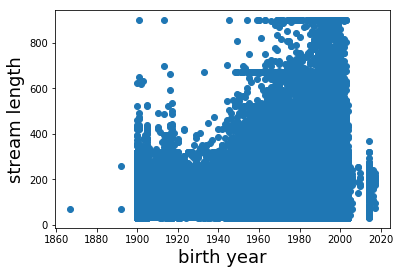

In [12]:
import matplotlib.pyplot as plt
plt.scatter(df[['birth_year']],df[['stream_length']])
plt.xlabel('birth year', fontsize=18)
plt.ylabel('stream length', fontsize=18)
plt.show()

<div class="alert alert-info">
<font size = 3>The graph represents the relationship between birth year and length of streams. We can observe a rising trend, that the younger the listener, the stream tend to be longer. In addition, there are outliers on both sides of the birth year spectrum.</font>

## Missing values

In [13]:
def num_missing(x):
  return sum(x.isnull())

print ("Missing values per column:")
df.apply(num_missing, axis=0)

Missing values per column:


Unnamed: 0                 0
Unnamed: 0.1               0
Unnamed: 0.1.1             0
day                        0
log_time                   0
mobile                     0
track_id                   0
isrc                       4
upc                        0
artist_name                0
track_name                 0
album_name                 0
customer_id                0
postal_code          1352181
access                     0
country_code               0
gender                 40422
birth_year             10021
filename                   0
region_code           261956
referral_code        3805499
partner_name         3378646
financial_product    2329099
user_product_type      22992
offline_timestamp    3805499
stream_length              0
stream_cached        3805499
stream_source              0
stream_source_uri    2761628
stream_device              0
stream_os                  0
track_uri                  0
track_artists              0
source               3805499
DateTime      

### Dropping redundant variables form the dataset

<div class="alert alert-info">
<font size=3>Below variables in majority consist of missing values and the information that these bare is unlikely to contribute to further model performance.</font>
</div>

In [14]:
df.drop('Unnamed: 0',1, inplace=True)
df.drop('Unnamed: 0.1',1, inplace=True)
df.drop('Unnamed: 0.1.1',1, inplace=True)
df.drop('partner_name',1, inplace=True)
df.drop('financial_product',1, inplace=True)
df.drop('offline_timestamp',1, inplace=True)
df.drop('source',1, inplace=True)
df.drop('referral_code',1, inplace=True) # dropping variables with large amount of missing vaules

# Variables analysis

<div class="alert alert-warning">
<font size = 3>In this section the focus is zoomed on particular variables that colud potentially be significant for further analysis.</font></div>


## Age

In [15]:
df.birth_year.head()

0    1968.0
1    1968.0
2    1995.0
3    1992.0
4    1979.0
Name: birth_year, dtype: float64

In [16]:
#Create a new variable 'age' 
df['age'] = pd.Series(0, index=df.index)
df['age'].head()

0    0
1    0
2    0
3    0
4    0
Name: age, dtype: int64

In [17]:
# Calculate difference

df['age'] = (2019 - df['birth_year'])
df['age'].head()

0    51.0
1    51.0
2    24.0
3    27.0
4    40.0
Name: age, dtype: float64

In [18]:
df.groupby('age').count().head()

,day,log_time,mobile,track_id,isrc,upc,artist_name,track_name,album_name,customer_id,...,hour,minute,week,month,year,date,weekday,weekday_name,playlist_id,playlist_name
age,,,,,,,,,,,,,,,,,,,,,
2.0,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,4,3
3.0,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,1,1
5.0,166,166,166,166,166,166,166,166,166,166,...,166,166,166,166,166,166,166,166,33,28
9.0,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,0,0
10.0,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,2,2


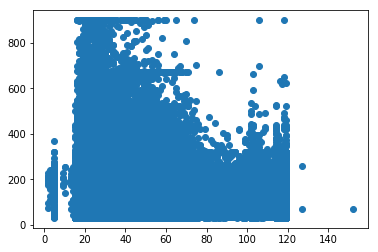

In [19]:
plt.scatter(df[['age']],df[['stream_length']])

<div class="alert alert-info">
<font size = 3>Form the above graph, we can see that there are outliers in the data, pepole with ages vary small or unrealistically large. Presented below, are numbers of streamers above age of 110 and below 15.</font></div>

In [20]:
df_over110 = df[df.age > 110]
df_over110.shape

(5468, 38)

In [21]:
df_under15 = df[df.age < 15]
df_under15.shape

(236, 38)

## Dropping outliers

In [22]:
df.drop(df[df.age > 110].index, inplace=True)

In [23]:
df.drop(df[df.age < 15].index, inplace=True)

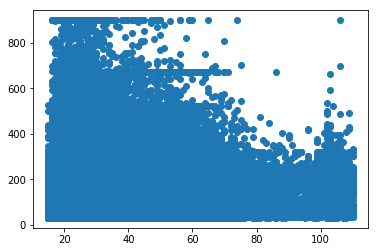

In [24]:
plt.scatter(df[['age']],df[['stream_length']])

<div class="alert alert-info"><font size = 3>The obvious outliers are no longer in the data.</font></div>

## Gender

In [25]:
# number of males and females
df.groupby('gender').count() 

,day,log_time,mobile,track_id,isrc,upc,artist_name,track_name,album_name,customer_id,...,minute,week,month,year,date,weekday,weekday_name,playlist_id,playlist_name,age
gender,,,,,,,,,,,,,,,,,,,,,
female,1953232,1953232,1953232,1953232,1953231,1953232,1953232,1953232,1953232,1953232,...,1953232,1953232,1953232,1953232,1953232,1953232,1953232,558636,524088,1952376
male,1806398,1806398,1806398,1806398,1806395,1806398,1806398,1806398,1806398,1806398,...,1806398,1806398,1806398,1806398,1806398,1806398,1806398,471584,442142,1805573


<div class="alert alert-info"><font size = 3> The majority of streams of almost 52% belong to female users, whereas the remaining 48% represent male users.</font></div>

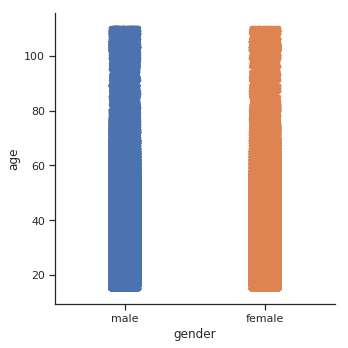

In [26]:
sns.set(style="ticks", color_codes=True)
sns.catplot(x="gender", y="age", data=df)

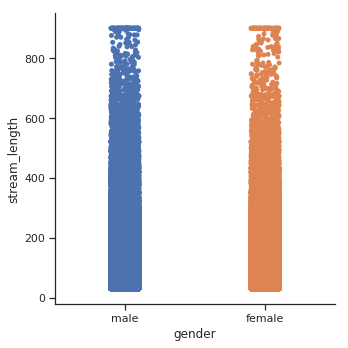

In [27]:
sns.set(style="ticks", color_codes=True)
sns.catplot(x="gender", y="stream_length", data=df)

<div class="alert alert-info">
<font size =3>The above graph represents the relationship between different gender and length of streams. We can observe that very long streams (above 600) are overall minority and there are slightly more male users with long streamlength than females, but the differeance is minor.</font>
</div>

## Stream Source

In [28]:
df.groupby('stream_source').count() #

,day,log_time,mobile,track_id,isrc,upc,artist_name,track_name,album_name,customer_id,...,minute,week,month,year,date,weekday,weekday_name,playlist_id,playlist_name,age
stream_source,,,,,,,,,,,,,,,,,,,,,
album,135197,135197,135197,135197,135195,135197,135197,135197,135197,135197,...,135197,135197,135197,135197,135197,135197,135197,0,0,134814
artist,115292,115292,115292,115292,115291,115292,115292,115292,115292,115292,...,115292,115292,115292,115292,115292,115292,115292,0,0,114928
collection,1619953,1619953,1619953,1619953,1619953,1619953,1619953,1619953,1619953,1619953,...,1619953,1619953,1619953,1619953,1619953,1619953,1619953,0,0,1616016
other,727503,727503,727503,727503,727502,727503,727503,727503,727503,727503,...,727503,727503,727503,727503,727503,727503,727503,0,0,725550
others_playlist,1148421,1148421,1148421,1148421,1148421,1148421,1148421,1148421,1148421,1148421,...,1148421,1148421,1148421,1148421,1148421,1148421,1148421,1042636,977965,1145234
search,53429,53429,53429,53429,53429,53429,53429,53429,53429,53429,...,53429,53429,53429,53429,53429,53429,53429,0,0,53232


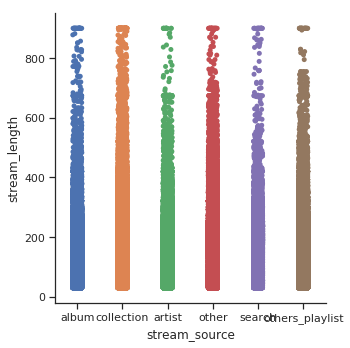

In [29]:
sns.catplot(x="stream_source", y="stream_length", data=df)

<div class="alert alert-info"> <font size =3>We can observe that collection has a a constant number of streams throught the length, whereas artist and other_playlist have significanty less longer streams. We can omit search, as the number of streams corresponding to that category is relatively small.

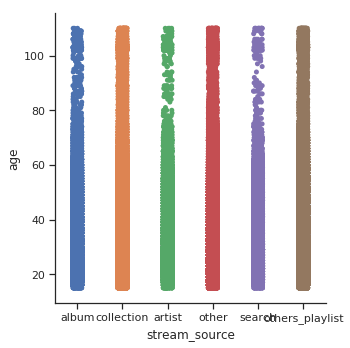

In [30]:
sns.catplot(x="stream_source", y="age", data=df)

<div class="alert alert-info"><font size =3>The relationship between age and sources of streams is constant and does not exhibit and tendencies.

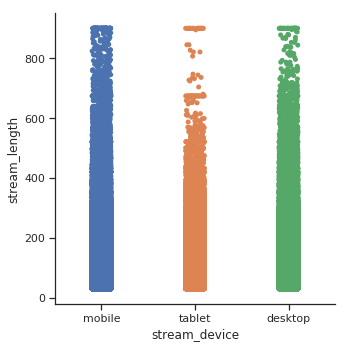

In [31]:
sns.catplot(x="stream_device", y="stream_length", data=df)

<div class="alert alert-info"><font size =3> From the above graph, we can infer that shortes streams tend to be played on tablets. On the other hand longest streams are performed on mobile devices and on desktops in the second place.

## Playlists

<div class="alert alert-warning"><font size =3> 
    From the main dataset it is not possible to analyse playlist characteristics as most of the data is missing. Therefore the additional dataset has to be used, consisting of playlist titles and their ids.
</font></div>

In [32]:
playlist_ids_and_titles.shape #Number of playlists and no. of variables in the dataframe

(194560, 2)

In [33]:
playlist_mapper.head()

,id,name
0,607qZnoGjqhpWjOaJWakmx,80er jaren
1,4xP3wJiHkHfyPcGBjsZcpf,Glee
2,1iHOfbhKGHImcrEJXhrUdg,Best of 1980s
3,08AR0IWSEfi0GCnB7b6AAW,Kesähitit/yhden hitin ihmeet/sekalaista
4,3DeVsW7nzA3qezOMowGkeu,Músicas para Transar


# 3. Data Preperation and Feature Engineering

<div class="alert alert-warning"><font size =3> 
    In this section the data will be prepared with respect to the requirements of later predictive models. Other steps involve creating dependant variable, as well as new fetures that will allow us to capture relationships between artists, playlists and users.
</font></div>

In [34]:
playlist_mapper.loc[playlist_mapper['name'] == 'Hot Hits UK']
playlist_mapper.loc[playlist_mapper['name'] == 'Massive Dance Hits']
playlist_mapper.loc[playlist_mapper['name'] == 'The Indie List']
playlist_mapper.loc[playlist_mapper['name'] == 'New Music Friday']

,id,name
25618,6FfOZSAN3N6u7v81uS7mxZ,Hot Hits UK
151213,37i9dQZF1DWY4lFlS4Pnso,Hot Hits UK


,id,name
94405,37i9dQZF1DX5uokaTN4FTR,Massive Dance Hits


,id,name
131216,37i9dQZF1DWVTKDs2aOkxu,The Indie List


,id,name
17513,3DL9G1ApvJDIR4IhWIJ8AQ,New Music Friday
27234,2mnRUIMJWqooAWlMjrlghi,New Music Friday
32459,1EnTBEgCWiTX2YHyAzkcFn,New Music Friday
35117,37i9dQZF1DWXJfnUiYjUKT,New Music Friday
72659,0dLTdpGyfO0PSyYXInvRd5,New Music Friday
83239,6wx0wiD9V6JJ2EOh4KM3Ox,New Music Friday
91903,35PofY2z4SqqbynOKXmdYV,New Music Friday
133600,4vGgUbD6tW2xMTABaVzCXo,New Music Friday
140255,37i9dQZF1DX4JAvHpjipBk,New Music Friday
170678,37i9dQZF1DWT2SPAYawYcO,New Music Friday


# Creating dependent variable


<div class="alert alert-warning"><font size =3> 
In this section a new binary variable "playlist_success" will be created that takes value of 1 if a song is on one of four playlists or 0 otherwise. However this <b>is not</b> a final dependant variable. The depandant varaible <b>"success_var"</b> will appear in the dataframe created by grouping the oryginal dataframe by artist names and it will be related to the variable "playlist_success" that is created at the moment.
    </font></div>

In [35]:
df['playlist_success'] = 0

In [36]:
#Hot Hits UK
df.loc[df.playlist_id =='6FfOZSAN3N6u7v81uS7mxZ' , 'playlist_success'] = 1
df.loc[df.playlist_id =='37i9dQZF1DWY4lFlS4Pnso' , 'playlist_success'] = 1
#Massive Dance
df.loc[df.playlist_id =='37i9dQZF1DX5uokaTN4FTR' , 'playlist_success'] = 1
#The Indie List
df.loc[df.playlist_id =='37i9dQZF1DWVTKDs2aOkxu' , 'playlist_success'] = 1
#New Music Friday
df.loc[df.playlist_id =='3DL9G1ApvJDIR4IhWIJ8AQ' , 'playlist_success'] = 1
df.loc[df.playlist_id =='2mnRUIMJWqooAWlMjrlghi' , 'playlist_success'] = 1
df.loc[df.playlist_id =='1EnTBEgCWiTX2YHyAzkcFn' , 'playlist_success'] = 1
df.loc[df.playlist_id =='37i9dQZF1DWXJfnUiYjUKT' , 'playlist_success'] = 1
df.loc[df.playlist_id =='0dLTdpGyfO0PSyYXInvRd5' , 'playlist_success'] = 1
df.loc[df.playlist_id =='6wx0wiD9V6JJ2EOh4KM3Ox' , 'playlist_success'] = 1
df.loc[df.playlist_id =='35PofY2z4SqqbynOKXmdYV' , 'playlist_success'] = 1
df.loc[df.playlist_id =='4vGgUbD6tW2xMTABaVzCXo' , 'playlist_success'] = 1
df.loc[df.playlist_id =='37i9dQZF1DX4JAvHpjipBk' , 'playlist_success'] = 1
df.loc[df.playlist_id =='37i9dQZF1DWT2SPAYawYcO' , 'playlist_success'] = 1

In [37]:
df[df['playlist_id'] == '6FfOZSAN3N6u7v81uS7mxZ'].head()

,day,log_time,mobile,track_id,isrc,upc,artist_name,track_name,album_name,customer_id,...,week,month,year,date,weekday,weekday_name,playlist_id,playlist_name,age,playlist_success
633,10,20160410T12:45:00,False,db62b1d507bc4fd1bc8b4785d82d6356,USAT21601204,7.567991e+10,Vinyl on HBO,Where Are You Now?,VINYL: Music From The HBO® Original Series - V...,b6dc09bcc7ed512dc268f17cfb35a116,...,14,4,2016,2016-04-10,6,Sunday,6FfOZSAN3N6u7v81uS7mxZ,Hot Hits UK,27.0,1
17270,10,20160210T18:30:00,False,bcdbf945cb194356b39ec0d36476e641,AUUQU1600001,8.256463e+11,Xavier Dunn,Fancy - Xavier Dunn Cover,BIMYOU,285bc2e475578285c8dcc4073ef0f5a8,...,6,2,2016,2016-02-10,2,Wednesday,6FfOZSAN3N6u7v81uS7mxZ,Hot Hits UK,33.0,1
26996,10,20160710T10:00:00,True,de3c49e047a945aba049b7467f9a20ad,USAT21601112,7.567991e+10,Sir The Baptist,Raise Hell (feat. ChuchPeople),Raise Hell (feat. ChuchPeople),7af71efffd6e31350dd33975fafe9263,...,27,7,2016,2016-07-10,6,Sunday,6FfOZSAN3N6u7v81uS7mxZ,Hot Hits UK,22.0,1
29244,10,20160510T17:00:00,False,3ccdfba451974b848e509b3a97b553ba,FR9W11520485,1.902960e+11,Amir,J'ai cherché,J'ai cherché,d4a7d0836ddb867b88747098352802a3,...,19,5,2016,2016-05-10,1,Tuesday,6FfOZSAN3N6u7v81uS7mxZ,Hot Hits UK,20.0,1
60803,10,20160510T11:15:00,False,5e6ae0c4967047dbb832caec9b1df082,FR43Y1600020,1.902960e+11,Starlovers,Feeling Good (feat. B. Lauren) - Radio Edit,Feeling Good (feat. B. Lauren),6f4bb297abefad0130fe2f6ce4ac2e64,...,19,5,2016,2016-05-10,1,Tuesday,6FfOZSAN3N6u7v81uS7mxZ,Hot Hits UK,23.0,1


In [38]:
df.loc[df['playlist_id'] == '37i9dQZF1DX4JAvHpjipBk'].head() # Check if the binary values has been assigned properly

,day,log_time,mobile,track_id,isrc,upc,artist_name,track_name,album_name,customer_id,...,week,month,year,date,weekday,weekday_name,playlist_id,playlist_name,age,playlist_success
78992,10,20170210T09:30:00,False,60cc38a2dcff4acc99b10976c1430f78,USAT21700178,7.567990e+10,Molly Kate Kestner,Prom Queen,Prom Queen,b43b4ffac020bb8b2ef28a605a9fbbeb,...,6,2,2017,2017-02-10,4,Friday,37i9dQZF1DX4JAvHpjipBk,New Music Friday,33.0,1
79000,10,20170210T10:30:00,False,60cc38a2dcff4acc99b10976c1430f78,USAT21700178,7.567990e+10,Molly Kate Kestner,Prom Queen,Prom Queen,c5dea1dca7ddf767956b1d59a12bbdf0,...,6,2,2017,2017-02-10,4,Friday,37i9dQZF1DX4JAvHpjipBk,New Music Friday,32.0,1
79001,10,20170210T12:00:00,True,60cc38a2dcff4acc99b10976c1430f78,USAT21700178,7.567990e+10,Molly Kate Kestner,Prom Queen,Prom Queen,76aab92ee246dee5125e23a2193e9250,...,6,2,2017,2017-02-10,4,Friday,37i9dQZF1DX4JAvHpjipBk,New Music Friday,25.0,1
82104,10,20170310T08:00:00,False,48aeb3962f44412e813423aa9d9f0674,USAT21700444,7.567990e+10,Sabrina Claudio,Too Much Too Late,Confidently Lost,2150191ae012be53ecc610a19ff19211,...,10,3,2017,2017-03-10,4,Friday,37i9dQZF1DX4JAvHpjipBk,New Music Friday,35.0,1
82151,10,20170310T18:15:00,False,48aeb3962f44412e813423aa9d9f0674,USAT21700444,7.567990e+10,Sabrina Claudio,Too Much Too Late,Confidently Lost,a1caac3ede05c7a6da92ac3a3a64615e,...,10,3,2017,2017-03-10,4,Friday,37i9dQZF1DX4JAvHpjipBk,New Music Friday,24.0,1


In [39]:
df.loc[df['playlist_name'] == 'Best songs ever'].head()

,day,log_time,mobile,track_id,isrc,upc,artist_name,track_name,album_name,customer_id,...,week,month,year,date,weekday,weekday_name,playlist_id,playlist_name,age,playlist_success
1189766,10,20170610T21:00:00,True,7c827daa49724e39be77eafc1ca1e085,USAT21500254,7.567990e+10,Charlie Puth,Marvin Gaye (feat. Meghan Trainor),Nine Track Mind,08cdf9a47e6374282edc7859cc11978a,...,23,6,2017,2017-06-10,5,Saturday,46tBq96NNkN0jDnaAxokdY,Best songs ever,20.0,0
1191550,10,20170610T18:30:00,True,7c827daa49724e39be77eafc1ca1e085,USAT21500254,7.567990e+10,Charlie Puth,Marvin Gaye (feat. Meghan Trainor),Nine Track Mind,727c9256b12b06e447454ad922e7bd16,...,23,6,2017,2017-06-10,5,Saturday,46tBq96NNkN0jDnaAxokdY,Best songs ever,18.0,0
1193559,10,20170710T16:15:00,True,7c827daa49724e39be77eafc1ca1e085,USAT21500254,7.567990e+10,Charlie Puth,Marvin Gaye (feat. Meghan Trainor),Nine Track Mind,87a3345df2186635afa932c394ac1386,...,28,7,2017,2017-07-10,0,Monday,46tBq96NNkN0jDnaAxokdY,Best songs ever,38.0,0
1196542,10,20170710T07:45:00,True,7c827daa49724e39be77eafc1ca1e085,USAT21500254,7.567990e+10,Charlie Puth,Marvin Gaye (feat. Meghan Trainor),Nine Track Mind,884a3da112a4e474dec515d47cd3ced4,...,28,7,2017,2017-07-10,0,Monday,46tBq96NNkN0jDnaAxokdY,Best songs ever,21.0,0
1236541,10,20170610T21:00:00,True,c9bab831115140618bba1c3597ea7d79,USAT21502909,7.567990e+10,Charlie Puth,We Don't Talk Anymore (feat. Selena Gomez),Nine Track Mind,4fbd75a1c0d3f7e5e87c7db1c97f3e35,...,23,6,2017,2017-06-10,5,Saturday,46tBq96NNkN0jDnaAxokdY,Best songs ever,20.0,0



### Now we need to focus on artists. To do that, we have to group the dataset by artist name. This dataframe will serve as the basis for the final daframe used to train and test predictive models.

In [40]:
artists = df.groupby(['artist_name']).mean()
artists.head()

,day,mobile,upc,birth_year,stream_length,stream_cached,hour,minute,week,month,year,weekday,age,playlist_success
artist_name,,,,,,,,,,,,,,
#90s Update,10.0,0.312500,1.902958e+11,1987.750000,133.687500,NaN,15.812500,23.437500,17.750000,4.75000,2017.000000,3.312500,31.250000,0.0
17 Memphis,10.0,0.500000,7.567989e+10,1991.250000,177.250000,NaN,12.333333,25.000000,28.000000,7.00000,2017.000000,0.000000,27.750000,0.0
2D,10.0,1.000000,8.256465e+11,2003.000000,81.000000,NaN,8.000000,0.000000,10.000000,3.00000,2017.000000,4.000000,16.000000,0.0
3JS,10.0,0.400000,1.902970e+11,1979.800000,234.000000,NaN,17.200000,39.000000,49.000000,12.00000,2016.000000,5.000000,39.200000,0.0
99 Percent,10.0,0.831783,7.567992e+10,1992.451286,154.117829,NaN,14.273643,22.732558,21.789147,5.68062,2016.204651,3.175194,26.548714,0.0


In [ ]:
# Dropping irrelevant variables from "artists" dataframe
artists.drop('hour',1, inplace=True)
artists.drop('minute',1, inplace=True)
artists.drop('week',1, inplace=True)
artists.drop('month',1, inplace=True)
artists.drop('weekday',1, inplace=True)
artists.drop('mobile',1, inplace=True)
artists.drop('upc',1, inplace=True)
artists.drop('birth_year',1, inplace=True)
artists.drop('stream_cached',1, inplace=True)



In [43]:
artists.sort_values(by=['playlist_success'], ascending = False).head()

,day,stream_length,year,age,playlist_success
artist_name,,,,,
HEDIA,10.0,160.316830,2017.000000,30.295686,0.373777
Coldabank,10.0,175.454655,2017.000000,29.203226,0.338976
Maggie Lindemann,10.0,175.125733,2016.988991,28.051476,0.224011
Jack wins,10.0,158.924772,2017.000000,29.342607,0.191941
Sage The Gemini,10.0,168.527487,2016.841465,27.817508,0.167189


In [44]:
# For each artist nuber of streams is counted - playlist_succes (either 0 or 1) is a good indicator,
# because the score is always present
streamcount = df.groupby(['artist_name']).count()
streamcount.sort_values(by=['playlist_success'], ascending = False).head()

,day,log_time,mobile,track_id,isrc,upc,track_name,album_name,customer_id,postal_code,...,week,month,year,date,weekday,weekday_name,playlist_id,playlist_name,age,playlist_success
artist_name,,,,,,,,,,,,,,,,,,,,,
Charlie Puth,447210,447210,447210,447210,447210,447210,447210,447210,447210,300731,...,447210,447210,447210,447210,447210,447210,103287,97817,445618,447210
Dua Lipa,315284,315284,315284,315284,315284,315284,315284,315284,315284,190650,...,315284,315284,315284,315284,315284,315284,95491,89320,314644,315284
Lukas Graham,310882,310882,310882,310882,310882,310882,310882,310882,310882,276986,...,310882,310882,310882,310882,310882,310882,58045,55359,309578,310882
Cheat Codes,255529,255529,255529,255529,255529,255529,255529,255529,255529,163170,...,255529,255529,255529,255529,255529,255529,71726,69429,255010,255529
Anne-Marie,247565,247565,247565,247565,247565,247565,247565,247565,247565,154404,...,247565,247565,247565,247565,247565,247565,83107,75907,246998,247565


## Creating dependent variable - final

<div class="alert alert-info"><font size =3> 
    It is time to create a dependant variable in the dataframe that is based on the value of "playlist_success". As "playlist_success" is an average of successes from the oryginal df dataframe, if its value is greater than 0, then this artist had to appear on at least one of four targer playlists and if its equal to 0, then the artist did not succed. Therefore "success_var" takes value of 1 if former is the case and 0 otherwise.
</font></div>

In [45]:
# dependent variable in the artists dataframe
artists['success_var'] = 0
artists.loc[artists.playlist_success > 0 , 'success_var'] = 1

artists.drop('playlist_success',1, inplace=True)

In [46]:
artists.head()

,day,stream_length,year,age,success_var
artist_name,,,,,
#90s Update,10.0,133.687500,2017.000000,31.250000,0
17 Memphis,10.0,177.250000,2017.000000,27.750000,0
2D,10.0,81.000000,2017.000000,16.000000,0
3JS,10.0,234.000000,2016.000000,39.200000,0
99 Percent,10.0,154.117829,2016.204651,26.548714,0


# Feature creation

<div class="alert alert-warning"><font size =3> 
    In this step special features are be created. These are grouped with respect to the group they describe: <b>artists</b>, <b>playlists</b> and <b>users features</b>.
</font></div>

## Artist features

<div class="alert alert-info"><font size =3> 
    Here we focus on artists. We are going to explore number of streams per artist, number of users per artist and finally passion score.
</font></div>

### Stream count

In [47]:
# Number of streams in this dataframe is the same as number of values in playlist_succes column for each artist.
streamcount.rename(columns={'playlist_success': 'streamcount'}, inplace=True)

In [48]:
stream_vector = streamcount[['streamcount']]

In [49]:
arch_artists = artists

#new dataframe
artists = pd.concat([artists, stream_vector], axis=1, join_axes=[artists.index])

In [50]:
artists.sort_values(by=['streamcount'], ascending = False).head()

,day,stream_length,year,age,success_var,streamcount
artist_name,,,,,,
Charlie Puth,10.0,185.768453,2016.218311,29.761255,1,447210
Dua Lipa,10.0,178.111303,2016.600934,29.751103,1,315284
Lukas Graham,10.0,207.316786,2016.126074,29.539208,1,310882
Cheat Codes,10.0,184.470753,2016.409300,28.066888,1,255529
Anne-Marie,10.0,182.482459,2016.512395,28.787804,1,247565


### Number of users per artist

In [51]:
df.groupby(['customer_id']).mean()

,day,mobile,upc,birth_year,stream_length,stream_cached,hour,minute,week,month,year,weekday,age,playlist_success
customer_id,,,,,,,,,,,,,,
0000074c93d4d2fe98a8b629f1a8b02d,10.0,0.000000,8.256460e+11,1993.0,237.000000,NaN,17.000000,30.0,23.000000,6.000000,2017.000000,5.000000,26.0,0.0
0000120ca3fa911b66f0dd30508e12dc,10.0,1.000000,8.256468e+11,1998.0,123.000000,NaN,10.000000,30.0,15.000000,4.000000,2017.000000,0.000000,21.0,0.0
000014da8d209225e2e626918ddf5b10,10.0,1.000000,1.902958e+11,1992.0,224.000000,NaN,22.000000,15.0,19.000000,5.000000,2017.000000,2.000000,27.0,1.0
000018833b9dbcd8d31cd847e1fbfc26,10.0,0.000000,1.902958e+11,1991.0,224.000000,NaN,16.000000,0.0,19.000000,5.000000,2017.000000,2.000000,28.0,0.0
00001b9a375f2006a1c91cc6df16a92b,10.0,1.000000,9.362492e+10,1980.0,191.000000,NaN,13.000000,30.0,36.000000,9.000000,2016.000000,5.000000,39.0,0.0
00001f4054c6ee88befeab82673e969a,10.0,1.000000,7.567991e+10,1991.0,186.000000,NaN,15.000000,15.0,36.000000,9.000000,2016.000000,5.000000,28.0,0.0
00001fc7e08acefaf8dcda21e4ec6e9a,10.0,1.000000,1.329879e+11,1998.0,214.000000,NaN,16.500000,30.0,27.500000,7.000000,2016.500000,3.500000,21.0,0.0
000020c62e21ffd8eda3042774d52a4f,10.0,1.000000,7.567990e+10,2000.0,218.000000,NaN,16.000000,30.0,49.000000,12.000000,2016.000000,5.000000,19.0,0.0
0000265d10a1f5b35a8830d7a370a009,10.0,1.000000,6.858392e+10,1975.0,190.000000,NaN,13.833333,27.5,22.500000,5.833333,2016.833333,3.000000,44.0,0.0


In [52]:
# A dataframe with varaibles of interest: artist name and customer_id

df_x = df[['artist_name', 'customer_id']].copy()

In [59]:
df_x.head()

,artist_name,customer_id
0,Sturgill Simpson,6c022a8376c10aae37abb839eb7625fe
1,Sturgill Simpson,6c022a8376c10aae37abb839eb7625fe
2,Sturgill Simpson,352292382ff3ee0cfd3b73b94ea0ff8f
3,Sturgill Simpson,c3f2b54e76696ed491d9d8f964c97774
4,Sturgill Simpson,6a06a9bbe042c73e8f1a3596ec321636


In [60]:
# number of unique customer_ids, therefore unique users in the dataset
len(df_x['customer_id'].unique())

2088106

In [61]:
# Customer_id's repeating for the same artists. Therefore, we have to look at len of unique customer_ids for 
# each artist. 
# Presented below an example of a certain customer_id and corresponding artists. We can see that not only artist vary
# among one customer_id, but also it corresponds to many streams of the same artists, in this case Anne-Marie.

df_x.loc[df['customer_id'] == 'af064258b61bbf4cf516f571a662ab2c']

,artist_name,customer_id
152041,Danny Ocean,af064258b61bbf4cf516f571a662ab2c
1865141,Dua Lipa,af064258b61bbf4cf516f571a662ab2c
3681644,Anne-Marie,af064258b61bbf4cf516f571a662ab2c
3693472,Anne-Marie,af064258b61bbf4cf516f571a662ab2c
3694984,Anne-Marie,af064258b61bbf4cf516f571a662ab2c
3696813,Anne-Marie,af064258b61bbf4cf516f571a662ab2c
3704130,Anne-Marie,af064258b61bbf4cf516f571a662ab2c
3711823,Anne-Marie,af064258b61bbf4cf516f571a662ab2c
3720804,Anne-Marie,af064258b61bbf4cf516f571a662ab2c
3734923,Anne-Marie,af064258b61bbf4cf516f571a662ab2c


In [62]:
# Dataframe with artist_names as indexes
users = df.groupby('artist_name')['customer_id'].nunique()
users

artist_name
#90s Update                       15
17 Memphis                        12
2D                                 1
3JS                                4
99 Percent                      1188
A Boogie Wit Da Hoodie          7696
A Boogie Wit da Hoodie         11109
A R I Z O N A                  58887
AGWA                               3
ALMA                               8
ALP                                4
AV AV AV                          54
AVVAH                             20
AXSHN                            107
Absofacto                        136
Adam Sample                       42
Adan Carmona                      11
Adia Victoria                    605
Alcatraz                           7
Alessio Bernabei                 156
Alex Hoyer                        27
Alex Roy                           3
Alexander Brown                  141
Alexander Cardinale              551
Alexander Charles                 51
Alice                             39
Aliose                    

In [57]:
# Merging the dataframes
artists = pd.concat([artists, users], axis=1, join_axes=[artists.index])

In [63]:
artists.rename(columns={"customer_id": 'users_per_artist'}, inplace=True)
artists.head()

,day,stream_length,year,age,success_var,streamcount,users_per_artist
artist_name,,,,,,,
#90s Update,10.0,133.687500,2017.000000,31.250000,0,16,15
17 Memphis,10.0,177.250000,2017.000000,27.750000,0,12,12
2D,10.0,81.000000,2017.000000,16.000000,0,1,1
3JS,10.0,234.000000,2016.000000,39.200000,0,5,4
99 Percent,10.0,154.117829,2016.204651,26.548714,0,1290,1188


### Passion Score

<div class="alert alert-info"><font size =3> 
    If value of Passion socre is above 1, then it represents the amout of repeated streams, therefore passion of users towards a certain artist.
</font></div>

In [64]:
artists["artist_passion_score"] = artists["streamcount"]/artists["users_per_artist"]

In [65]:
artists.head()

,day,stream_length,year,age,success_var,streamcount,users_per_artist,artist_passion_score
artist_name,,,,,,,,
#90s Update,10.0,133.687500,2017.000000,31.250000,0,16,15,1.066667
17 Memphis,10.0,177.250000,2017.000000,27.750000,0,12,12,1.000000
2D,10.0,81.000000,2017.000000,16.000000,0,1,1,1.000000
3JS,10.0,234.000000,2016.000000,39.200000,0,5,4,1.250000
99 Percent,10.0,154.117829,2016.204651,26.548714,0,1290,1188,1.085859


## Playlist Features

<div class="alert alert-info"><font size =3> 
    In this section, new playlis features are created: <b>stream counts, unique users</b> and <b>passion score.</b>
</font></div>

### Playlist stream counts

In [66]:
dfplaylist = df[['playlist_name', 'artist_name', 'customer_id']]
dfplaylist = dfplaylist.dropna()
dfplaylist_1 = dfplaylist.dropna()
dfplaylist_1 = pd.DataFrame(dfplaylist_1.groupby('artist_name').playlist_name.value_counts()) # Grouping the dataframe 
                                                                                              # by artist and playlist

dfplaylist_1 = dfplaylist_1.rename(columns={'playlist_name':'p_stream_counts'})
dfplaylist_1.head()

p_stream_counts
artist_name playlist_name                            
#90s Update After Work House                        3
            ENERGY - HIT MUSIC ONLY!                1
17 Memphis  Wild Country                            6
99 Percent  Musical.ly songs                        8
            Party Bangers!                          8

In [67]:
# Creating a separate dataframe with numbers of unique users per playlist 
dfplaylist_2 = pd.DataFrame(dfplaylist.groupby('playlist_name').customer_id.nunique())
dfplaylist_2 = dfplaylist_2.rename(columns = {'customer_id':'p_unique_users'})
dfplaylist_2.head()

,p_unique_users
playlist_name,
SEPTEMBER 2016 TOP HITS,14
2015 Hits,2
2016 Rap ?,5
?Space ?,1
Avicii - Tiësto - Calvin Harris - Alesso - Swedish house mafia - Zedd - Nause - David Guetta - Har,1


In [68]:
# Merging two dataframes together
p_feature_data = pd.merge(dfplaylist_1, dfplaylist_2, right_index = True, left_index = True)
p_feature_data.head()

p_stream_counts  p_unique_users
artist_name playlist_name                                            
#90s Update After Work House                        3              43
            ENERGY - HIT MUSIC ONLY!                1              31
17 Memphis  Wild Country                            6             191
99 Percent  Musical.ly songs                        8              18
            Party Bangers!                          8             138

In [69]:
# Passion Score calculation
p_feature_data['p_passion'] = (p_feature_data['p_stream_counts']/p_feature_data['p_unique_users'])
p_feature_data.head()

p_stream_counts  p_unique_users  \
artist_name playlist_name                                               
#90s Update After Work House                        3              43   
            ENERGY - HIT MUSIC ONLY!                1              31   
17 Memphis  Wild Country                            6             191   
99 Percent  Musical.ly songs                        8              18   
            Party Bangers!                          8             138   

                                      p_passion  
artist_name playlist_name                        
#90s Update After Work House           0.069767  
            ENERGY - HIT MUSIC ONLY!   0.032258  
17 Memphis  Wild Country               0.031414  
99 Percent  Musical.ly songs           0.444444  
            Party Bangers!             0.057971

In [70]:
p_feature_data_avg = p_feature_data.groupby(['artist_name']).mean()

In [71]:
# Merging new dataframe with the main one
artists = pd.concat([artists, p_feature_data_avg], axis=1, join_axes=[artists.index])
artists.head()

,day,stream_length,year,age,success_var,streamcount,users_per_artist,artist_passion_score,p_stream_counts,p_unique_users,p_passion
artist_name,,,,,,,,,,,
#90s Update,10.0,133.687500,2017.000000,31.250000,0,16,15,1.066667,2.000000,37.0,0.051013
17 Memphis,10.0,177.250000,2017.000000,27.750000,0,12,12,1.000000,6.000000,191.0,0.031414
2D,10.0,81.000000,2017.000000,16.000000,0,1,1,1.000000,NaN,NaN,NaN
3JS,10.0,234.000000,2016.000000,39.200000,0,5,4,1.250000,NaN,NaN,NaN
99 Percent,10.0,154.117829,2016.204651,26.548714,0,1290,1188,1.085859,2.666667,53.5,0.458756


## User features

<div class="alert alert-info"><font size =3> 
    Here, we add new features concerning user characteristics: <b> gender and age.</b>
</font></div>

### Gender Breakdown

In [72]:
gender_vec = df.groupby('artist_name').count()
gender_vec['gender'].head()

artist_name
#90s Update      16
17 Memphis       12
2D                1
3JS               5
99 Percent     1272
Name: gender, dtype: int64

In [73]:
# A new binary variable
df['gender_binary'] = 0

In [74]:
# Female taking value of 1, male of 0 from the original dataset
df.loc[df.gender == 'female' , 'gender_binary'] = 1
df.loc[df.gender == 'male' , 'gender_binary'] = 0

In [75]:
# Grouping average of the score by the artist name
gender_split = df.groupby(['artist_name'])['gender_binary'].mean()
gender_split.head()

artist_name
#90s Update    0.437500
17 Memphis     0.666667
2D             0.000000
3JS            0.200000
99 Percent     0.668217
Name: gender_binary, dtype: float64

In [76]:
artists = pd.concat([artists, gender_split], axis=1, join_axes=[artists.index])
artists.head()

,day,stream_length,year,age,success_var,streamcount,users_per_artist,artist_passion_score,p_stream_counts,p_unique_users,p_passion,gender_binary
artist_name,,,,,,,,,,,,
#90s Update,10.0,133.687500,2017.000000,31.250000,0,16,15,1.066667,2.000000,37.0,0.051013,0.437500
17 Memphis,10.0,177.250000,2017.000000,27.750000,0,12,12,1.000000,6.000000,191.0,0.031414,0.666667
2D,10.0,81.000000,2017.000000,16.000000,0,1,1,1.000000,NaN,NaN,NaN,0.000000
3JS,10.0,234.000000,2016.000000,39.200000,0,5,4,1.250000,NaN,NaN,NaN,0.200000
99 Percent,10.0,154.117829,2016.204651,26.548714,0,1290,1188,1.085859,2.666667,53.5,0.458756,0.668217


<div class="alert alert-info"><font size =3> 
    The variable <b>"gender_binary"</b> indicates what is the percentage of females among listeners.
</font></div>

## Age features

<div class="alert alert-info"><font size =3> 
    In this subsection, we create new bins for ages of listeners.
</font></div>

### Creating age categories (bins)

In [77]:
# The categories have been widened form oryginal four groups, because smaller categories were highly correlated with other 
# variables in the correlation matrix at the later stage. This way the correlation is smaller.

artists['age_to_28'] = 0
artists['age_28_35'] = 0
artists['age_over_35'] = 0



In [78]:
artists.loc[artists.age < 29.0, 'age_to_28'] = 1

artists.loc[artists.age > 28, 'age_28_35'] = 1
artists.loc[artists.age > 36, 'age_28_35'] = 0

artists.loc[artists.age > 35, 'age_over_35'] = 1 

In [79]:
artists.head()

,day,stream_length,year,age,success_var,streamcount,users_per_artist,artist_passion_score,p_stream_counts,p_unique_users,p_passion,gender_binary,age_to_28,age_28_35,age_over_35
artist_name,,,,,,,,,,,,,,,
#90s Update,10.0,133.687500,2017.000000,31.250000,0,16,15,1.066667,2.000000,37.0,0.051013,0.437500,0,1,0
17 Memphis,10.0,177.250000,2017.000000,27.750000,0,12,12,1.000000,6.000000,191.0,0.031414,0.666667,1,0,0
2D,10.0,81.000000,2017.000000,16.000000,0,1,1,1.000000,NaN,NaN,NaN,0.000000,1,0,0
3JS,10.0,234.000000,2016.000000,39.200000,0,5,4,1.250000,NaN,NaN,NaN,0.200000,0,0,1
99 Percent,10.0,154.117829,2016.204651,26.548714,0,1290,1188,1.085859,2.666667,53.5,0.458756,0.668217,1,0,0


## Dimensionality reduction - Principle Component Analysis (PCA)

<div class="alert alert-info"><font size =3> 
    Now we procced to reduction of dimensions of regions. As the number of these is too large (over 400), we need to use PCA in order to drag down the number of dimensions - here we assume 10.
</font></div>

In [80]:
regions = df.groupby(['artist_name'])['region_code'].size()
regions_df = pd.DataFrame(regions)
regions_df.head()

,region_code
artist_name,
#90s Update,16
17 Memphis,12
2D,1
3JS,5
99 Percent,1290


In [81]:
from sklearn import decomposition
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

regions = pd.DataFrame(df.groupby(['artist_name', 'region_code']).size()).unstack(level='region_code')
regions = regions.fillna(0)

regions_copy = regions.copy()
regions_copy.head()

0                                              ...             \
region_code    0  500  501  502  504  505  506  508  510  511 ...  SE-G SE-H   
artist_name                                                   ...              
#90s Update  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
17 Memphis   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
2D           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
3JS          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
99 Percent   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   

                                                     
region_code SE-M SE-N SE-O SE-S SE-T SE-W SE-Y SE-Z  
artist_name                                          
#90s Update  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
17 Memphis   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2D           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3JS          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
99 Percent   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 513 columns]

<div class="alert alert-info"><font size =3> 
    The table looks as expected, with region codes as columns and rows as artists. Corresponding values indicate presence of particular region within each artist pool and the amount of streams from these regions.
</font></div>

In [82]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
PCA = pca.fit_transform(regions_copy)

pca
PCA

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

array([[-9.01538097e+02,  4.08155613e+00, -1.48207411e+01, ...,
        -2.00566762e+00, -2.52006218e-01,  7.88698602e-01],
       [-9.03180887e+02,  5.15561609e+00, -1.50357872e+01, ...,
        -1.57499843e+00,  2.20885134e-01,  5.72800041e-01],
       [-9.04478394e+02,  4.96840430e+00, -1.51169105e+01, ...,
        -1.64676145e+00, -3.17555522e-01,  4.97070808e-01],
       ...,
       [-8.85636941e+02,  4.33289905e+00, -1.49627136e+01, ...,
        -3.04180739e-01, -1.83393175e+00,  1.96935541e+00],
       [ 2.73274207e+04, -1.43457043e+03, -7.08877698e+02, ...,
        -1.33444917e+02, -6.06440756e+01,  3.04454630e+02],
       [-9.04105548e+02,  5.59546575e+00, -1.47209780e+01, ...,
        -9.40981110e-01, -3.73983074e-01,  9.56334268e-01]])

In [83]:
artists_pca = pd.DataFrame(data = PCA, columns=['PCA_1','PCA_2','PCA_3','PCA_4','PCA_5','PCA_6','PCA_7','PCA_8','PCA_9','PCA_10'])
artists_pca = artists_pca.set_index(regions_copy.index)
artists_pca.head()
artists_pca.shape

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10
artist_name,,,,,,,,,,
#90s Update,-901.538097,4.081556,-14.820741,3.327475,-5.792958,6.048877,2.423172,-2.005668,-0.252006,0.788699
17 Memphis,-903.180887,5.155616,-15.035787,3.345584,-6.114316,6.250748,2.535164,-1.574998,0.220885,0.572800
2D,-904.478394,4.968404,-15.116911,3.991239,-5.667662,6.227642,1.800111,-1.646761,-0.317556,0.497071
3JS,-903.481055,4.620649,-15.127908,3.942445,-6.001265,5.732852,1.493809,-1.587364,-0.389878,0.219599
99 Percent,-714.375949,12.833381,-26.525486,7.821035,-17.622359,0.381259,5.604691,2.120636,-3.725288,-0.410704


(649, 10)

### Percentage of variance explained by PCA

In [84]:
sum(pca.explained_variance_ratio_)*100

99.98324181451078

<div class="alert alert-info"><font size =3> 
    The variance explainde by PCA is almost 100% wich is a good indicator. We have crated ten new PCA region bins corresponding to each artist.
</font></div>

In [97]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)
plt.xlabel("N components")
plt.ylabel("Cummulative Explained Variance")
plt.title("Ratio Variation explained by PCA")
         
## all my work was conducted on my personal computer and when uploaded to Faculty, 
## this graph stopped working at the last minute

SyntaxError: invalid syntax (<ipython-input-97-bfe6ed574f29>, line 2)

<div class="alert alert-info"><font size = 3>The most of variance is already explained by 4 components as the curve flattens significantly beyond this point and moves upwards very slightly, so the increase in sum explained variance is small.</font>

Text(0.5, 0, 'N components')

Text(0, 0.5, 'Cummulative Explained Variance')

Text(0.5, 1.0, 'Ratio Variation explained by PCA')

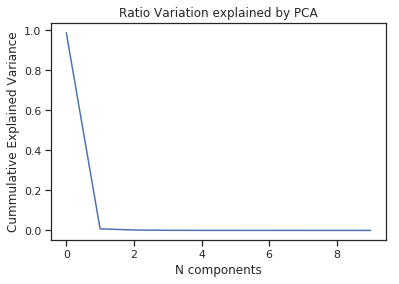

In [87]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel("N components")
plt.ylabel("Cummulative Explained Variance")
plt.title("Ratio Variation explained by PCA")

<div class="alert alert-info"> <font size = 3>Most of variation is explained by the first component, therefore the significant and rapid decrease up to that point, after that the ratio of variation is small.</font>

## Merge datasets

<div class="alert alert-info"><font size =3> 
    In this section remaining feature dataframes are merged with the main one. The only one is PCA dataframe.
</font></div>

In [98]:
artists = pd.concat([artists, artists_pca], axis=1, join_axes=[artists.index])

In [99]:
artists

,day,stream_length,year,age,success_var,streamcount,users_per_artist,artist_passion_score,p_stream_counts,p_unique_users,...,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10
artist_name,,,,,,,,,,,,,,,,,,,,,
#90s Update,10.0,133.687500,2017.000000,31.250000,0,16,15,1.066667,2.000000,37.000000,...,-901.538097,4.081556,-14.820741,3.327475,-5.792958,6.048877,2.423172,-2.005668,-0.252006,0.788699
17 Memphis,10.0,177.250000,2017.000000,27.750000,0,12,12,1.000000,6.000000,191.000000,...,-903.180887,5.155616,-15.035787,3.345584,-6.114316,6.250748,2.535164,-1.574998,0.220885,0.572800
2D,10.0,81.000000,2017.000000,16.000000,0,1,1,1.000000,NaN,NaN,...,-904.478394,4.968404,-15.116911,3.991239,-5.667662,6.227642,1.800111,-1.646761,-0.317556,0.497071
3JS,10.0,234.000000,2016.000000,39.200000,0,5,4,1.250000,NaN,NaN,...,-903.481055,4.620649,-15.127908,3.942445,-6.001265,5.732852,1.493809,-1.587364,-0.389878,0.219599
99 Percent,10.0,154.117829,2016.204651,26.548714,0,1290,1188,1.085859,2.666667,53.500000,...,-714.375949,12.833381,-26.525486,7.821035,-17.622359,0.381259,5.604691,2.120636,-3.725288,-0.410704
A Boogie Wit Da Hoodie,10.0,151.986746,2016.530150,26.322725,0,9884,7696,1.284304,41.590909,444.242424,...,1342.040048,-507.528672,267.611111,34.096403,30.180561,15.589134,32.932355,16.397870,-5.295173,37.698893
A Boogie Wit da Hoodie,10.0,171.714751,2017.000000,26.279049,1,13213,11109,1.189396,16.111111,1770.277778,...,493.732236,505.435345,453.637110,-0.634191,-21.115637,-63.385181,42.162126,-7.873118,-81.030129,17.757541
A R I Z O N A,10.0,189.218971,2016.770901,29.394618,1,68717,58887,1.166930,59.276657,1416.720461,...,9324.678553,273.487787,69.914952,-595.783828,145.038252,-291.467532,-21.356368,149.684419,31.309114,-42.715195
AGWA,10.0,178.000000,2016.333333,53.333333,0,3,3,1.000000,1.000000,5.000000,...,-904.374373,5.114848,-14.930498,4.011671,-6.143618,6.151546,1.985854,-1.943342,-0.420592,0.430674


# Preprocessing

<div class="alert alert-warning"><font size =3> 
    To make sure that the data is clean and ready for processing in the model step, we need to replace any missing values that might appear in the dataset and also chce the collinearity between variables, ase these are not favourable when running predictive models.
</font></div>

In [100]:
# New dataframe that will serve as the final version
final_df = artists

## Missing Values

<div class="alert alert-info"><font size =3> 
    When handling missing values, imputer we use Imputer to replace any missing values with median. If there are still missing vaules after that, we will replace them with 0.
</font></div>

In [101]:
from sklearn.preprocessing import Imputer

imp = Imputer(missing_values='NaN', strategy='median', axis=0)
for i in final_df.columns:
    if final_df[i].dtype == 'int64' or final_df[i].dtype == 'float64':
        final_df[i] = imp.fit_transform(final_df[[i]])

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [102]:
final_df.isnull().mean()

day                     0.0
stream_length           0.0
year                    0.0
age                     0.0
success_var             0.0
streamcount             0.0
users_per_artist        0.0
artist_passion_score    0.0
p_stream_counts         0.0
p_unique_users          0.0
p_passion               0.0
gender_binary           0.0
age_to_28               0.0
age_28_35               0.0
age_over_35             0.0
PCA_1                   0.0
PCA_2                   0.0
PCA_3                   0.0
PCA_4                   0.0
PCA_5                   0.0
PCA_6                   0.0
PCA_7                   0.0
PCA_8                   0.0
PCA_9                   0.0
PCA_10                  0.0
dtype: float64

In [103]:
final_df_1 = final_df
final_df.fillna(0, inplace= True)
final_df.isnull().mean()

day                     0.0
stream_length           0.0
year                    0.0
age                     0.0
success_var             0.0
streamcount             0.0
users_per_artist        0.0
artist_passion_score    0.0
p_stream_counts         0.0
p_unique_users          0.0
p_passion               0.0
gender_binary           0.0
age_to_28               0.0
age_28_35               0.0
age_over_35             0.0
PCA_1                   0.0
PCA_2                   0.0
PCA_3                   0.0
PCA_4                   0.0
PCA_5                   0.0
PCA_6                   0.0
PCA_7                   0.0
PCA_8                   0.0
PCA_9                   0.0
PCA_10                  0.0
dtype: float64

In [104]:
final_df

,day,stream_length,year,age,success_var,streamcount,users_per_artist,artist_passion_score,p_stream_counts,p_unique_users,...,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10
artist_name,,,,,,,,,,,,,,,,,,,,,
#90s Update,10.0,133.687500,2017.000000,31.250000,0.0,16.0,15.0,1.066667,2.000000,37.000000,...,-901.538097,4.081556,-14.820741,3.327475,-5.792958,6.048877,2.423172,-2.005668,-0.252006,0.788699
17 Memphis,10.0,177.250000,2017.000000,27.750000,0.0,12.0,12.0,1.000000,6.000000,191.000000,...,-903.180887,5.155616,-15.035787,3.345584,-6.114316,6.250748,2.535164,-1.574998,0.220885,0.572800
2D,10.0,81.000000,2017.000000,16.000000,0.0,1.0,1.0,1.000000,4.000000,92.000000,...,-904.478394,4.968404,-15.116911,3.991239,-5.667662,6.227642,1.800111,-1.646761,-0.317556,0.497071
3JS,10.0,234.000000,2016.000000,39.200000,0.0,5.0,4.0,1.250000,4.000000,92.000000,...,-903.481055,4.620649,-15.127908,3.942445,-6.001265,5.732852,1.493809,-1.587364,-0.389878,0.219599
99 Percent,10.0,154.117829,2016.204651,26.548714,0.0,1290.0,1188.0,1.085859,2.666667,53.500000,...,-714.375949,12.833381,-26.525486,7.821035,-17.622359,0.381259,5.604691,2.120636,-3.725288,-0.410704
A Boogie Wit Da Hoodie,10.0,151.986746,2016.530150,26.322725,0.0,9884.0,7696.0,1.284304,41.590909,444.242424,...,1342.040048,-507.528672,267.611111,34.096403,30.180561,15.589134,32.932355,16.397870,-5.295173,37.698893
A Boogie Wit da Hoodie,10.0,171.714751,2017.000000,26.279049,1.0,13213.0,11109.0,1.189396,16.111111,1770.277778,...,493.732236,505.435345,453.637110,-0.634191,-21.115637,-63.385181,42.162126,-7.873118,-81.030129,17.757541
A R I Z O N A,10.0,189.218971,2016.770901,29.394618,1.0,68717.0,58887.0,1.166930,59.276657,1416.720461,...,9324.678553,273.487787,69.914952,-595.783828,145.038252,-291.467532,-21.356368,149.684419,31.309114,-42.715195
AGWA,10.0,178.000000,2016.333333,53.333333,0.0,3.0,3.0,1.000000,1.000000,5.000000,...,-904.374373,5.114848,-14.930498,4.011671,-6.143618,6.151546,1.985854,-1.943342,-0.420592,0.430674


## Correlation matrix

<div class="alert alert-warning"><font size =3> 
    Multicorrelation matrix presents the coefficients of correlation between variables. As mentioned above, significant correlations are not favourable as these distort predictions of classifiers.
</font></div>

In [105]:
final_df_1.corr()

,day,stream_length,year,age,success_var,streamcount,users_per_artist,artist_passion_score,p_stream_counts,p_unique_users,...,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10
day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stream_length,NaN,1.000000,-0.007321,0.252031,-0.044175,-0.010565,-0.009969,0.049326,-0.060235,-0.030934,...,-0.007939,-2.253504e-02,-0.020133,0.005038,-0.017650,-0.006361,-0.003483,0.004279,-4.858423e-04,-0.004093
year,NaN,-0.007321,1.000000,-0.028173,-0.042872,-0.122286,-0.124106,-0.044943,-0.053716,-0.049268,...,-0.135288,1.204903e-01,0.039778,-0.042651,-0.023542,0.034394,-0.004631,-0.043479,-1.534693e-02,0.007132
age,NaN,0.252031,-0.028173,1.000000,-0.154964,-0.086100,-0.084550,0.022123,-0.116267,-0.044084,...,-0.085997,-2.089595e-02,-0.057953,-0.016912,-0.036823,0.036545,0.020349,-0.028258,8.341568e-03,0.002910
success_var,NaN,-0.044175,-0.042872,-0.154964,1.000000,0.425432,0.425879,-0.009454,0.582458,0.261600,...,0.429893,1.969108e-02,0.129010,-0.018771,0.116295,-0.160627,-0.091184,0.141300,-2.255496e-02,0.001377
streamcount,NaN,-0.010565,-0.122286,-0.086100,0.425432,1.000000,0.996111,0.013102,0.434632,0.009652,...,0.991831,1.122319e-01,-0.001888,-0.019329,-0.006489,-0.011766,0.002789,-0.001548,3.372266e-02,-0.003907
users_per_artist,NaN,-0.009969,-0.124106,-0.084550,0.425879,0.996111,1.000000,0.008472,0.447001,0.009822,...,0.990252,8.897848e-02,-0.011435,-0.057248,-0.060782,0.015689,-0.017145,0.024152,2.040032e-02,0.001426
artist_passion_score,NaN,0.049326,-0.044943,0.022123,-0.009454,0.013102,0.008472,1.000000,-0.019626,-0.012034,...,0.012057,1.418246e-02,0.005773,0.022807,0.037570,-0.009798,0.009056,-0.004119,1.275602e-02,0.001912
p_stream_counts,NaN,-0.060235,-0.053716,-0.116267,0.582458,0.434632,0.447001,-0.019626,1.000000,0.150522,...,0.437960,4.080157e-02,0.065746,-0.115205,0.071695,-0.008373,-0.149091,0.145884,-3.807725e-02,-0.050521
p_unique_users,NaN,-0.030934,-0.049268,-0.044084,0.261600,0.009652,0.009822,-0.012034,0.150522,1.000000,...,0.009602,5.002953e-03,0.008645,-0.000957,0.016238,-0.022803,-0.027572,0.018760,1.239463e-03,-0.010880


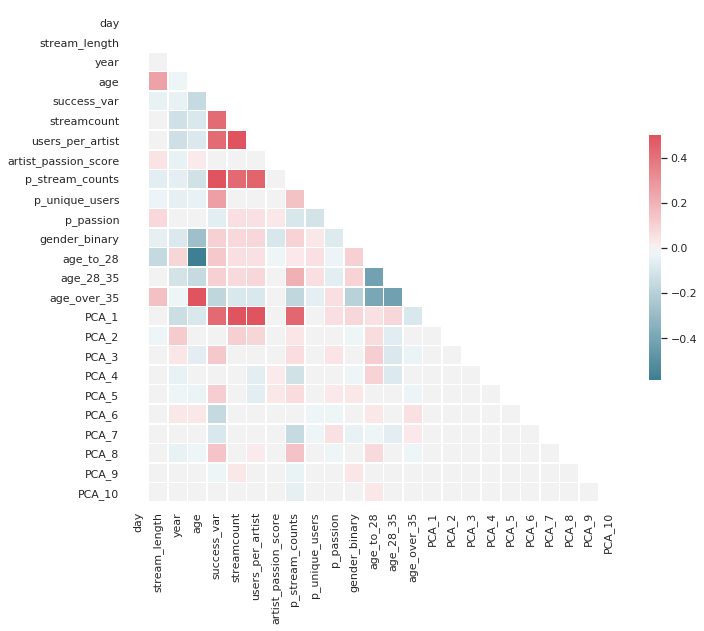

In [106]:
sns.set(style="white")
corr = final_df_1.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<div class="alert alert-info"><font size =3> We can observe that age is highly correlated with age_over_35 and negatively correlated with age_to_28. Moreover, streamcount is significantly correlated with users_per_artist.

### Dropping corelated varaibles

<div class="alert alert-info"><font size =3> 
    We proceed to remove correlated variables form the <b>final_df_1</b>. PCA_1, although correlated with success variable, steramcount, could include important information and deleting it may not bring positive effect.
</font></div>

In [107]:
final_df_1.drop('age',1, inplace=True)
final_df_1.drop('p_stream_counts',1, inplace=True) # this information is already included in 
                                                   # the playlist passion score, threfore can be deleted


## Class Balance

<div class="alert alert-info"><font size =3> 
    In order to improve accuracy of the classifiers we need to balance successful and unsuccessful artists with respect to ratio of 40/60.
</font></div>

In [108]:
# Original balance of classes
class_balance = final_df.success_var.value_counts()[0]/final_df.success_var.value_counts().sum()*100
print('Class Balance = ',class_balance)
print('nrow:',len(final_df.index))

Class Balance =  87.42424242424242
nrow: 660


In [109]:
from sklearn.utils import resample
# take all the successful artists
successful = final_df_1.loc[final_df_1['success_var'] == 1]

#separate all unsuccessful artists
no_successful = final_df_1.loc[final_df_1['success_var'] == 0]


no_succ_resmapled = resample(final_df_1, replace = False, n_samples = int(len(successful)*1.5) , random_state = 42)
# multiplication by 1.5 because of the oryginal ratio of both groups


In [110]:
#Regulating the balance and printing the final number of observations in the dataset
df_masterfinal = successful.append(no_succ_resmapled, sort=False)
class_balance1 = df_masterfinal.success_var.value_counts()[0]/df_masterfinal.success_var.value_counts().sum()*100

print('nrow:',len(df_masterfinal.index))

nrow: 207


In [111]:
df_masterfinal['success_var'].dtype

df_masterfinal['success_var'].astype(int)

dtype('float64')

artist_name
A Boogie Wit da Hoodie        1
A R I Z O N A                 1
AXSHN                         1
Absofacto                     1
All Tvvins                    1
Amir                          1
Anne-Marie                    1
Arman Cekin                   1
BETSY                         1
Basic Tape                    1
Black Saint                   1
Catherine McGrath             1
Celeste                       1
Charlie Puth                  1
Cheat Codes                   1
Clairmont                     1
Coasts                        1
Coldabank                     1
Conrad Sewell                 1
Creeper                       1
Dae Dae                       1
Dan Owen                      1
Dave                          1
Devin Dawson                  1
Dua Lipa                      1
Dusky Grey                    1
HEDIA                         1
Jack wins                     1
James Hype                    1
Johnny Yukon                  1
                            

# 4. Evaluate algorithms

<div class="alert alert-warning"><font size =3> 
    The time has come to implement models on the dataset prepared in previous steps. First we have to split the dataset into training and test set. Then we are going to implement five models: <b> Logistic Regression, Deciosion Tree, Gaussian Naive Bias, Multi Layer Perception, lazy classifier k-Nearest Neighbours and at last Random Forest.</b> Each of them will have an accuracy score which we will compare and pick the best performing model.
</font></div>

## Data split into test and training set

In [112]:
from sklearn.model_selection import train_test_split

SEED = 50 # to initialize random number generator for reproducibility
TEST_SIZE = 0.3
x = df_masterfinal
x = x.drop('success_var',1)
# the whole dataframe
y = df_masterfinal['success_var'].astype(int) # binary success variable from dr_masterfinal

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=TEST_SIZE, random_state=SEED)

## Model 1: Logistic Regression

In [113]:
from sklearn.linear_model import LogisticRegression # it's a classifier, not a regressor!
EPOCHS = 100 # max number of iterations for solvers to converge
model_1 = LogisticRegression(solver='sag', max_iter=EPOCHS)

In [114]:
model_1.fit(x_train, y_train)
pred_probas = model_1.predict_proba(x_test)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

In [115]:
# Accuracy score
score_1 = model_1.score(x_test, y_test)
print(score_1)

0.873015873015873


## Model 2: Decision Tree

In [116]:
from sklearn.tree import DecisionTreeClassifier

clf_2 = DecisionTreeClassifier()

In [117]:
clf_2.fit(x_train, y_train)
clf_2.feature_importances_ 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

array([0.        , 0.02304908, 0.09787595, 0.0086245 , 0.02310439,
       0.05970809, 0.61613525, 0.05415051, 0.01178852, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.0388195 , 0.        , 0.        , 0.        , 0.01857585,
       0.04816836, 0.        ])

In [121]:
# Accuracy score
score_2 = clf_2.score(x_test, y_test)
print(score_2)

0.7619047619047619


In [122]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf_2, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [123]:
# Standard deviation, mean and particular scores
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(rmse_scores)

Scores: [0.4472136  0.4472136  0.4472136  0.36514837 0.25819889 0.4472136
 0.46291005 0.37796447 0.39223227 0.48038446]
Mean: 0.4125692898004236
Standard deviation: 0.06294763926787295


## Model 3: Gaussian Naive Bias

In [124]:
from sklearn.naive_bayes import GaussianNB

clf_3 = GaussianNB()
clf_3.fit(x_train, y_train)
target_pred = clf_3.predict(x_test)

GaussianNB(priors=None, var_smoothing=1e-09)

In [125]:
target_pred

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0])

In [126]:
#Accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, target_pred, normalize = True)

0.8253968253968254

## Model 4: Multi-Layer Perceptron (MLP)

In [150]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter=150)
mlp.fit(x_train, y_train)
target_pred_1 = mlp.predict(x_test)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=150, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [151]:
#Accuracy score
accuracy_score(y_test, target_pred_1)

0.873015873015873

## Model 5: k-Nearest Neighbour

In [137]:
from sklearn.neighbors import KNeighborsClassifier

clf_5 = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
clf_5.fit(x_train,y_train)

#Predict Output
target_pred_2 = clf_5.predict(x_test) # 0:Overcast, 2:Mild
print(target_pred_2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

[0 0 1 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1
 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0]


In [138]:
accuracy_score(y_test, target_pred_2, normalize = True)

0.9047619047619048

<font size = 3> The accuracy score is combarable and very close to this of Artificial Neural Network MLP.

## Random Forest - ensemble model

In [139]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True, max_depth=2)

random_forest.fit(x_train, y_train)

forest_proba = random_forest.predict(x_test)
score_6 = random_forest.score(x_test, y_test)
print(score_6)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

0.8571428571428571


<div class="alert alert-success"><font size =3> 
    Model of choice is <b>Multi-Layer Perceptron (MLP)</b> as its' further improvement of predictability is greater and also it is worth investigating the combination of Neural Network MLP and kNN model, as it may improve results and prove a better performance(1).</font>


(1) A. Eskandarinia, H. Nazarpour, M. Teimouri, Z. Ahmadi; Comparison of Neural Network and K-Nearest Neighbor Methods in Daily Flow Forecasting. Journal of Applied Sciences, 10: 1006-1010. 2010


# 5. Hyper Parameter Tuning

<div class="alert alert-warning"><font size =3> 
    To perform Hyper Parameter tuning we will use Grid Search  - an approach for sampling search. It is to extract addtional information form hyperparameters of the chsen model.
</font></div>

In [152]:
from sklearn.model_selection import GridSearchCV, cross_val_score

param_grid = [
  {'max_iter': [50, 150, 1000], 'learning_rate': ['adaptive'], 'activation': ['logistic'], 'solver': ['sgd']},
  {'max_iter': [50, 150, 1000], 'learning_rate': ['invscaling'], 'activation': ['relu']},
 ]

CV_rfc = GridSearchCV(estimator = mlp, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)


/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn'

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=150, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'max_iter': [50, 150, 1000], 'learning_rate': ['adaptive'], 'activation': ['logistic'], 'solver': ['sgd']}, {'max_iter': [50, 150, 1000], 'learning_rate': ['invscaling'], 'activation': ['relu']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [153]:
sorted(CV_rfc.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'mean_train_score',
 'param_activation',
 'param_learning_rate',
 'param_max_iter',
 'param_solver',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split0_train_score',
 'split1_test_score',
 'split1_train_score',
 'split2_test_score',
 'split2_train_score',
 'split3_test_score',
 'split3_train_score',
 'split4_test_score',
 'split4_train_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score',
 'std_train_score']

## Final parameters of the MLP model

<div class="alert alert-warning"><font size =3> 
    Final parameters of the ANN MLP model are presented below.
</font></div>

In [154]:
CV_rfc.best_params_

{'activation': 'relu', 'learning_rate': 'invscaling', 'max_iter': 1000}

In [155]:
mlp_final = MLPClassifier(activation = 'logistic', learning_rate = 'adaptive', max_iter = 100, solver = 'sgd')
mlp_final.fit(x_train, y_train)
target_pred_final = mlp_final.predict(x_test)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [156]:
accuracy_score(y_test, target_pred_final, normalize = True)

0.873015873015873

<div class="alert alert-info"><font size =3>
As we can see, the accuracy has improved by implemeting parameters suggested by Gridsearch.

# Ensamble

<div class="alert alert-warning"><font size =3> 
    In this step we combine models to further improve the prediction of tuned model. According to the previous analysis and the study, we are will now try to combine MLP and kNN.
</font></div>

In [157]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42)

voting_clf = VotingClassifier(
    estimators=[('knn', clf_5), ('rf', mlp_final), ('svc', svm_clf)],
    voting='hard')
voting_clf.fit(x_train, y_train)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier(estimators=[('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')), ('rf', MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, e...rbf', max_iter=-1, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [158]:
for clf in (clf_5, mlp_final, svm_clf, voting_clf):
    clf.fit(x_train, y_train);
    y_pred = clf.predict(x_test);
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

KNeighborsClassifier 0.9047619047619048


/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

MLPClassifier 0.873015873015873


/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False)

SVC 0.6190476190476191


/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier(estimators=[('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')), ('rf', MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, e...rbf', max_iter=-1, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

VotingClassifier 0.873015873015873


<div class="alert alert-success"><font size =3>Voting classifier outperforms single models, therefore <b>the ensemble model is the best model with the strongest predicting power among others.*</b> </font>
<br>
    <br>
*(in the oryginal model the value was highier and approximately 0.9, after re-running in Faculty this parameter has sligtly changed)
    
</b>

# Results

<div class="alert alert-warning"><font size =3>
    As a result of the analysis, presented below are confusion matrix and ROC curve.

In [170]:
from sklearn.metrics import confusion_matrix

finalmodel = voting_clf
finalmodel.fit(x_train,y_train)

y_pred_final = finalmodel.predict(x_test)
train_score = finalmodel.score(x_train,y_train)
validation_score = accuracy_score(y_test, y_pred_final)
confusion_mat = confusion_matrix(y_test, y_pred_final)

print(validation_score)
print(confusion_mat)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier(estimators=[('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')), ('rf', MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, e...rbf', max_iter=-1, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

0.873015873015873
[[35  0]
 [ 8 20]]


## Confusion Matrix

<Figure size 432x288 with 0 Axes>

Confusion matrix, without normalization
[[35  0]
 [ 8 20]]


/opt/anaconda/envs/Python3/lib/python3.6/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


<Figure size 432x288 with 0 Axes>

Normalized confusion matrix
[[1.   0.  ]
 [0.29 0.71]]


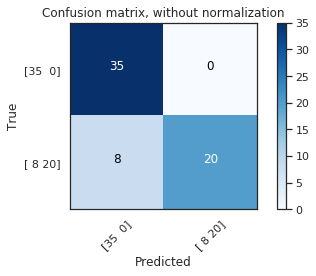

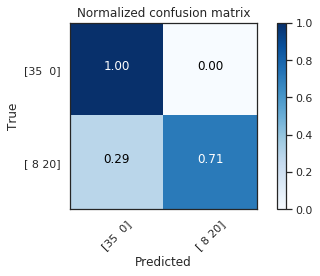

In [160]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True')
    plt.xlabel('Predicted')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=confusion_mat,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=confusion_mat, normalize=True,
                      title='Normalized confusion matrix')

plt.show()



<div class="alert alert-info"><font size = 3>
    Presented above are two confusion matrices. The first one is without normalizations and the second one is normalized. True Negatives equal to 1 and False Negatives consequenlty equal to 0. False Positives amount for 0.29 and the remaining 0.71 belongs to True Positives. 

## ROC Curve and AUC

<div class="alert alert-warning"><font size = 3>
Plot of the <b>true positive rate</b> of the y axis vs <b>false-positive</b> on x axis for every possible classification threshold.
</div>

In [163]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot


auc = roc_auc_score(y_test, y_pred_final) ######
print('AUC: %.3f' % auc)

AUC: 0.857


<div class="alert alert-info"><font size = 3> The Area Under the Curve is equal to 85.7%</font></div>

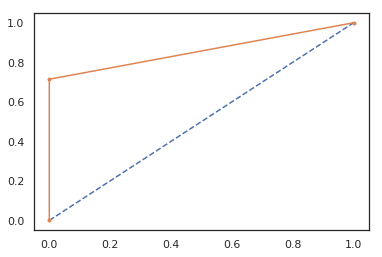

In [164]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_final)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

<div class="alert alert-info"><font size = 3>
    At recall level at 0.71 the amount of false positive outcomes thet the classifier produces is still very smalll and it is the trade-off point. It starts to rise rapidly beyound this point and a small increase to 0.8 in true positive rate on y axis results in a significant increase in false positive rate.


<div class="alert alert-success"><font size =3>
    <b>Summary</b>
    <br>
As a result of the above analysis, the best classifier for the success of artists based of developed features is an ensamble model consisting of k Nearest Neighbours together with Artificial Neural Network MLP model, which in addition has been tuned for better fit and prediction. At the end it is vital to look at the confusion matrix together with the ROC curve in order to determine the trade-off between the accuracy of positive predictions (precision) an recall wich is a rate of true positives.

# References

1. Eskandarinia A., Nazarpour H., Teimouri M., Ahmadi Z., Comparison of Neural Network and K-Nearest Neighbor Methods (Daily Flow Forecasting. Journal of Applied Sciences, 10: 1006-1010, 2010)
2. Géron A., Hands-On Machine Learning with Scikit-Learn and TensorFlow (O’Reilly Media, Inc., 2017)